<a href="https://colab.research.google.com/github/dhchoi1457/untitled1/blob/master/Imbalance_%EC%84%B1%EB%8A%A5%ED%85%8C%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# 데이터 import 및 간단한 전처리

# XGB , LR , SVM , DNN 모델 구조 확정

# metric은 f1 score

# imbalanced 개선 테스트 진행

import os

print (os.getcwd())

default_path = "/content/drive/My Drive/Colab Notebooks/data/"

train_path = default_path + "/Data_set.csv"
#test, No label

/content


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, precision_score
import itertools

from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb

In [ ]:
#read the data
df = pd.read_csv(train_path, encoding="cp949")
df.shape

(100233, 69)

In [ ]:
#범주형 확인 후 one-hot
#df.dtypes[df.dtypes == 'object']

#one-hot encoding & add to df
tmp = "OCCP_NAME_G"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "MATE_OCCP_NAME_G"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "LT1Y_PEOD_RATE"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "AGE"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "SEX"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "TEL_MBSP_GRAD"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "CBPT_MBSP_YN"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "PAYM_METD"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "LINE_STUS"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

df.loc[df['LAST_CHLD_AGE'].isnull(), 'LAST_CHLD_AGE'] = 0
df = df.drop('CUST_ID',1)

In [ ]:
# feature , target split
y = np.array(df.TARGET.tolist())     #classes: 1..fraud, 0..no fraud
df = df.drop('TARGET', 1)
X = np.array(df.as_matrix())   # features

# train, val, test split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, train_size=0.5, random_state=42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(y_test, y_pred):
  print('Precision =     {:.3f}'.format(tp/(tp+fp)))

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(80186, 128)
(10023, 128)
(10024, 128)


In [ ]:
X_train

array([[1., 1., 2., ..., 0., 0., 1.],
       [3., 1., 2., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 2., 3., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])


## Base 모델 성능 평가

### LR

In [ ]:
# model1 LR
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#lr = LogisticRegression()
#cv_params = {'C': [0.01,0.1,1,10,100], 'penalty':['l1','l2']}    # parameters to be tries in the grid search\
#csv = GridSearchCV(LogisticRegression(), cv_params, scoring = 'f1', cv = 5)
#csv.fit(X_tr_scaled, y_train)

lr = LogisticRegression(C=10, random_state=42, penalty='l1')
lr.fit(X_tr_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_val_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

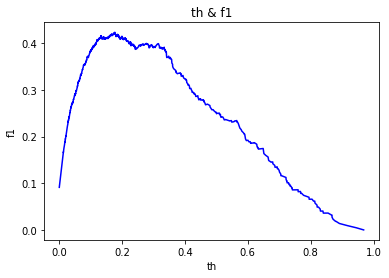

Val result
f1 : 0.42388059701492536 / thr: 0.177662342752687


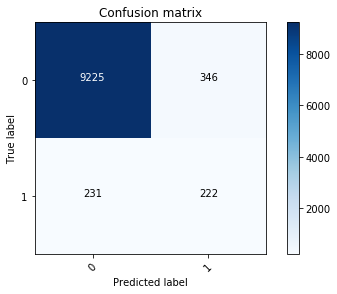

precision: 0.391
recall: 0.49
f1_score: 0.435


In [ ]:

#val 에서 th값 탐색
now_model = lr

#scores 값인지 잘 체크
y_pred = now_model.predict_proba(X_val_scaled)[:,1]

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict_proba(X_test_scaled)[:,1]
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))


### SVM (not fitting)

In [ ]:
# model2 SVM

# 마지막에 시도해보기

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = Pipeline([('clf', SVC(random_state=1))])

#param_range = [ 0.01, 0.1, 1.0, 10.0]
param_range = [1.0]

param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
   ]


#scaling
#scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)

csv3=GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring='f1', cv=5)

# 이거 다른 곳에서 실행코드 가지고 와서 실행해보기
# https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-7-%EC%BB%A4%EB%84%90-%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0/


In [ ]:
%time csv3 = csv3.fit(X_tr_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

CPU times: user 3h 52min 51s, sys: 5.97 s, total: 3h 52min 57s
Wall time: 3h 53min 17s


In [ ]:
csv3.best_params_

{'clf__C': 1.0, 'clf__kernel': 'linear'}

In [ ]:
# SVM_2
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)

model2_svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_tr_scaled, y_train)


In [ ]:
now_model = model2_svm
y_pred = now_model.predict(X_val)


NameError: ignored

In [ ]:
cm = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_val, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_val, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_val, y_pred, average='binary')))

NameError: ignored

### RF

In [ ]:
# model_3.1 RF
# https://www.kaggle.com/andreanuzzo/balance-the-imbalanced-rf-and-xgboost-with-smote

from sklearn.ensemble import RandomForestClassifier

model3_rf = RandomForestClassifier(n_jobs=-1, random_state = 42,
                             n_estimators=500, 
                             max_features='auto',
                             min_samples_leaf=2,
                             criterion = 'entropy')

model3_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

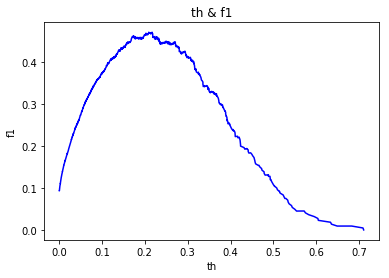

Val result
f1 : 0.47071352502662406 / thr: 0.21695821661998133


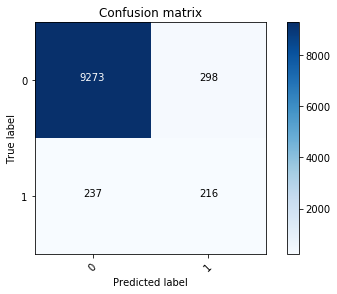

precision: 0.42
recall: 0.477
f1_score: 0.447


In [ ]:
#val 에서 th값 탐색
now_model = model3_rf

#scores 값인지 잘 체크
y_pred = now_model.predict_proba(X_val)[:,1]

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict_proba(X_test)[:,1]
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))

In [ ]:
# model_3.2 RF, class_weight 
# https://www.kaggle.com/andreanuzzo/balance-the-imbalanced-rf-and-xgboost-with-smote

from sklearn.ensemble import RandomForestClassifier

model3_rf = RandomForestClassifier(n_jobs=-1, random_state = 42,
                             n_estimators=500,
                             class_weight = "balanced_subsample",
                             max_features='auto',
                             min_samples_leaf=2,
                             criterion = 'entropy')

model3_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

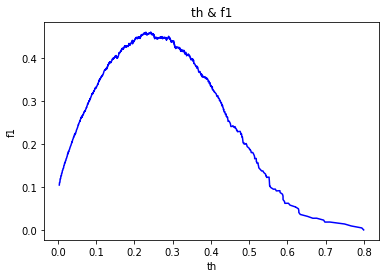

Val result
f1 : 0.46028513238289204 / thr: 0.24328728801671187


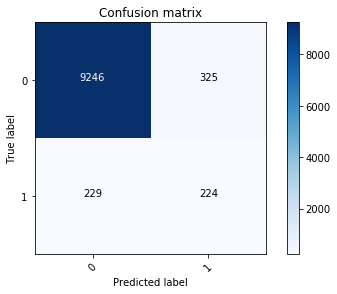

precision: 0.408
recall: 0.494
f1_score: 0.447


In [ ]:
#val 에서 th값 탐색
now_model = model3_rf

#scores 값인지 잘 체크
y_pred = now_model.predict_proba(X_val)[:,1]

precision, recall, th = precision_recall_curve(y_val, y_pred)


f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict_proba(X_test)[:,1]
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))

In [ ]:
# model_4 XGB
#base prediction
xgdmat_train = xgb.DMatrix(X_train, y_train)
xgdmat_val = xgb.DMatrix(X_val, y_val)
xgdmat_test = xgb.DMatrix(X_test, y_test)
#xgb_final = xgb.train(params_final, xgdmat_train, num_boost_round = 100)

params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight': 2, 'max_delta_step': 0, 'subsample': 1}

xgb_final = xgb.train(params, xgdmat_train, num_boost_round = 100)

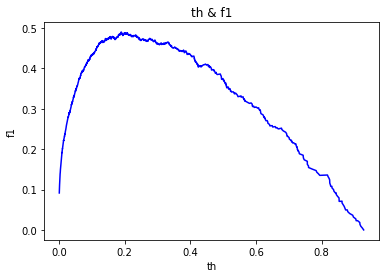

Val result
f1 : 0.48923679060665365 / thr: 0.18852143


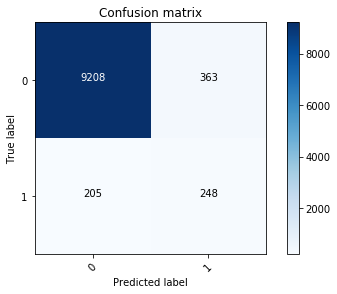

precision: 0.406
recall: 0.547
f1_score: 0.466


In [ ]:
#val 에서 th값 탐색
now_model = xgb_final

#scores 값인지 잘 체크
y_pred = now_model.predict(xgdmat_val)

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict(xgdmat_test)
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))

### Balanced RF

In [ ]:
# model_5 Balanced RF

from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(n_jobs=-1, 
                                     random_state = 42,
                                     n_estimators=500, 
                                     max_features='auto',
                                     min_samples_leaf=2,
                                     criterion = 'entropy')

clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                               criterion='entropy', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=500,
                               n_jobs=-1, oob_score=False, random_state=42,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

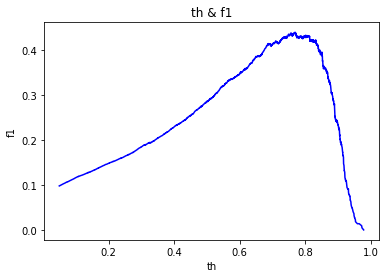

Val result
f1 : 0.4389312977099237 / thr: 0.7691597069597068


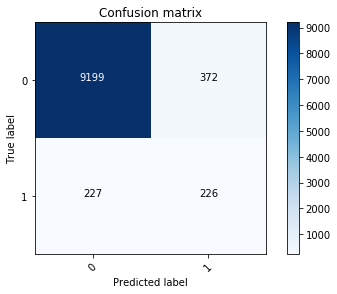

precision: 0.378
recall: 0.499
f1_score: 0.43


In [ ]:
#val 에서 th값 탐색
now_model = clf

#scores 값인지 잘 체크
y_pred = now_model.predict_proba(X_val)[:,1]

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict_proba(X_test)[:,1]
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))

### IMB- XGB

In [ ]:
# model_6 IMB- XGB
!pip install imbalance-xgboost

In [ ]:
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
from sklearn.model_selection import GridSearchCV

#search params
xgboster_focal = imb_xgb(special_objective='focal')
xgboster_weight = imb_xgb(special_objective='weighted')
CV_focal_booster = GridSearchCV(xgboster_focal, {"focal_gamma":[1.0,1.5,2.0,2.5,3.0]})
CV_weight_booster = GridSearchCV(xgboster_weight, {"imbalance_alpha":[1.5,2.0,2.5,3.0,4.0]})

CV_focal_booster.fit(X_train, y_train)
CV_weight_booster.fit(X_train, y_train)
opt_focal_booster = CV_focal_booster.best_estimator_
opt_weight_booster = CV_weight_booster.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
CV_weight_booster.best_params_

{'imbalance_alpha': 1.5}

In [ ]:
#params1 = {'focal_gamma': 3.0 ,'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight': 2, 'max_delta_step': 0, 'subsample': 1}

In [ ]:
#params2 = {'special_objective':'weighted', 'imbalance_alpha': 1.5 ,'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight': 2, 'max_delta_step': 0, 'subsample': 1}

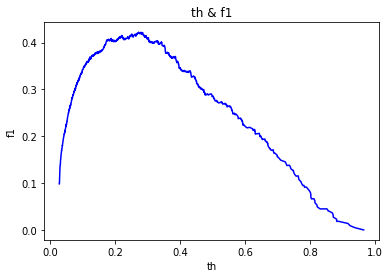

Val result
f1 : 0.42217484008528783 / thr: 0.27209458


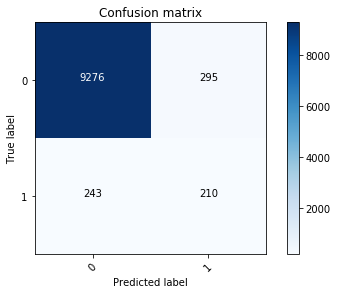

precision: 0.416
recall: 0.464
f1_score: 0.438


In [ ]:
#Focal model

#val 에서 th값 탐색
now_model = opt_focal_booster

#scores 값인지 잘 체크
y_pred = now_model.predict_sigmoid(X_val, y=None)

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict_sigmoid(X_test, y=None)
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))

In [ ]:
#weight model

#val 에서 th값 탐색
now_model = opt_weight_booster

#scores 값인지 잘 체크
y_pred = now_model.predict_sigmoid(X_val, y=None)

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict_sigmoid(X_test, y=None)
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))